In [2]:
import pandas as pd  # allows to work and structure our data in a tabular/dictionary style format - Using types DataFrame
import numpy as np # De facto scientific computing packge, all math functions - Arrays, create matrices, do linear algebra.

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

# make pretty graphs, visualize
from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc



# Spotify Song Attributes
- import data
- EDA - visualize and find structure in data
- Train a classifier - DecisionTreeClassifier
- predict target using the trained classifier


In [3]:
data = pd.read_csv('data.csv')

In [36]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [33]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


# Split data into a 'test' set and 'training' set. 
# Take some  training data, build an algorithm predict whether the user likes song.
# Then, we want to test that trained_classifier_algorithm against a separate set of data (test_data)

In [42]:
train, test = train_test_split(data, test_size= 0.15)
print("Training data: {}, Test data: {}".format(len(train), len(test)));

Training data: 1714, Test data: 303


In [ ]:
X_train, X_test, y_train, y_test

In [32]:
train.shape

(1714, 17)

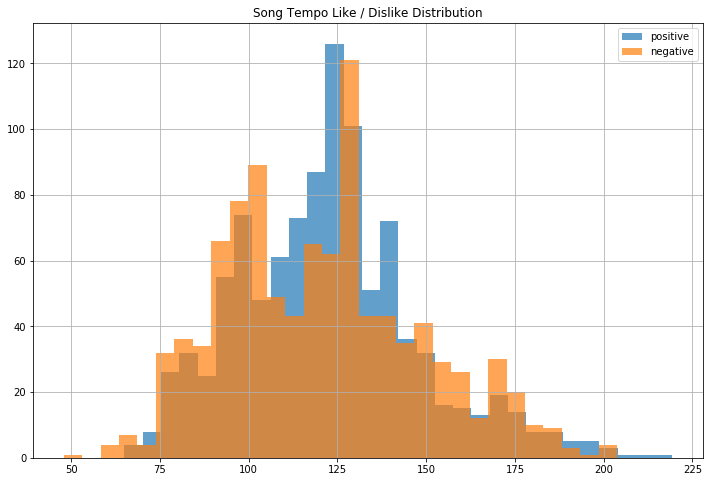

In [5]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label= 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label= 'negative')
plt.legend(loc = "upper right")


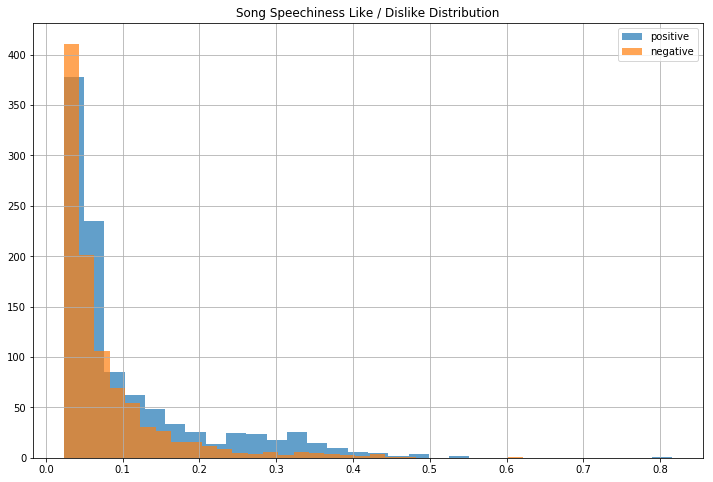

In [27]:
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

fig = plt.figure(figsize = (12,8))
plt.title("Song Speechiness Like / Dislike Distribution")
pos_speechiness.hist(alpha = 0.7, bins = 30, label= 'positive')
neg_speechiness.hist(alpha = 0.7, bins = 30, label= 'negative')
plt.legend(loc = "upper right")

# songs between 110-125, 130-140 bpm are liked more than disliked.
# songs between 85-105, 150-165 bpm are disliked more than they are liked

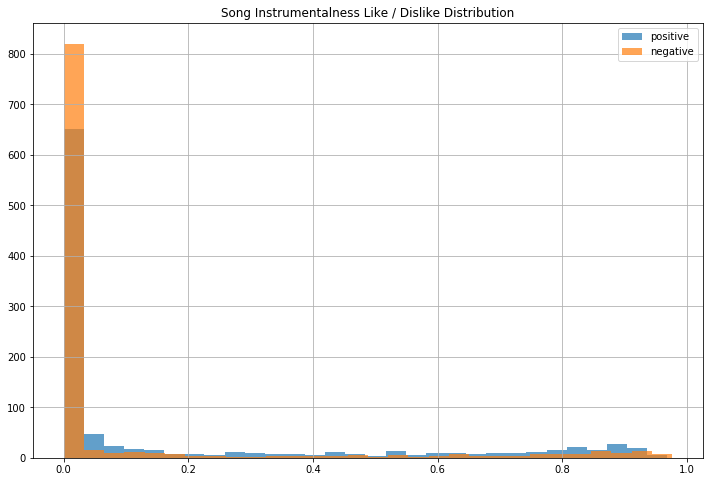

In [8]:
pos_instr = data[data['target'] == 1]['instrumentalness']
neg_instr = data[data['target'] == 0]['instrumentalness']

fig = plt.figure(figsize = (12,8))
plt.title("Song Instrumentalness Like / Dislike Distribution")
pos_instr.hist(alpha = 0.7, bins = 30, label= 'positive')
neg_instr.hist(alpha = 0.7, bins = 30, label= 'negative')
plt.legend(loc = "upper right")

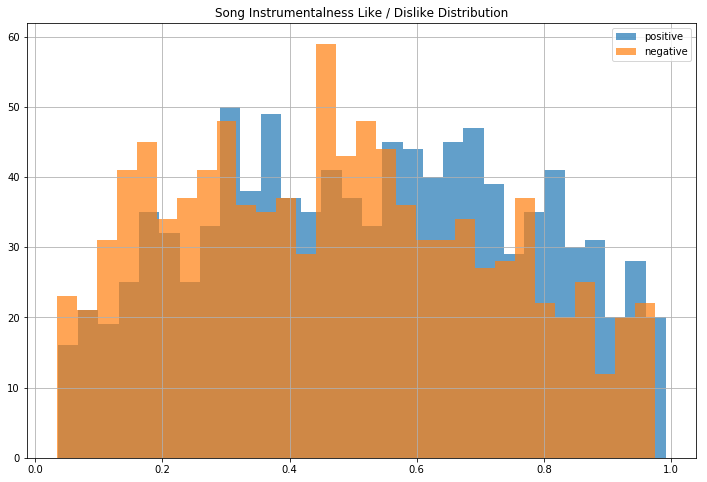

In [9]:
pos_val = data[data['target'] == 1]['valence']
neg_val = data[data['target'] == 0]['valence']

fig = plt.figure(figsize = (12,8))
plt.title("Song Instrumentalness Like / Dislike Distribution")
pos_val.hist(alpha = 0.7, bins = 30, label= 'positive')
neg_val.hist(alpha = 0.7, bins = 30, label= 'negative')
plt.legend(loc = "upper right")

In [6]:
c = DecisionTreeClassifier(min_samples_split=100)

In [7]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms"]

In [8]:
# Define training set - from pandas dataframe
x_train = train[features] # all the rows or X-values (samples)
y_train = train["target"] # 

# Define test set - from pandas dataframe
x_test = test[features]
y_test = test["target"]

# Lets build our decision tree now

In [9]:
dt = c.fit(x_train, y_train)  # just like that, scikitlearn will generate a decision tree

In [24]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features) # graph_viz comes from SciKit-Learn - Creation and rendering of graph descriptions in the DOT language of the Graphviz graph drawing 
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path) # create graph image by 'write_png' - command acts on 'path' provided by show_tree method
    img = misc.imread(path) # read an image from a file as an array
    plt.rcParams["figure.figsize"] = (20,20) # then simply use matplotlib to plot the array
    plt.imshow(img) # show img generated by SciPy from image path given by pydotplus
    

/home/anujnarayanaswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


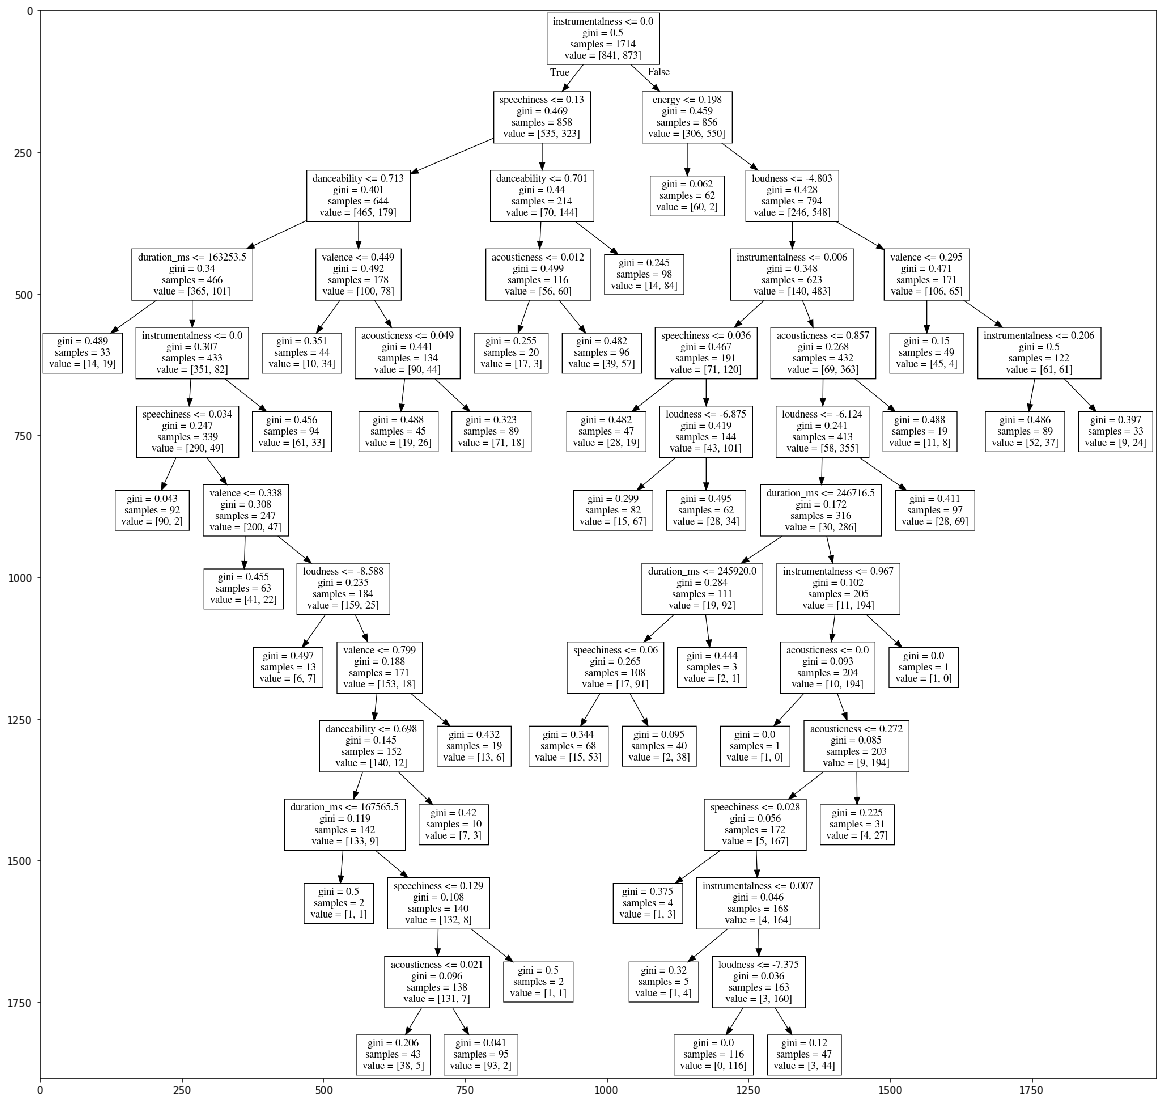

In [25]:
show_tree(dt, features, 'dec_tree_01.png') # show tree method takes args - ('dt', 'features', 'path for image file')